In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("health_data.csv")
data.head()

,age,restbps,chol,category
0,26,109,243,0
1,27,106,156,0
2,28,107,225,0
3,27,105,277,0
4,30,96,221,0


In [3]:
X = data.to_numpy()[:, :3]
Y = data.to_numpy()[:, 3]
split = 0.8 #using 70:30 split, random each time
train_samples = np.random.choice(X.shape[0], int(split*X.shape[0]))
test_samples = np.array([i for i in range(X.shape[0]) if i not in list(train_samples)])

X_train = X[[train_samples]]
Y_train = Y[[train_samples]].reshape((1,train_samples.shape[0]))
print(Y_train)

X_test = X[[test_samples]]
Y_test = Y[[test_samples]].reshape((1,test_samples.shape[0]))

[[0 1 1 0 1 0 0 0 0 0 1 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0
  1 0 1 1 0 1 1 0 0 1 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0
  1 0 1 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0
  0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 0
  1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
  1 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 1 1 1 1 0 0 1 1 0 1 0 0 1 0 1 1 1
  0 0 1 0 1 1 0 1 1 1 0 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 0 0 0 1 0
  0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0
  1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 1 1 1 0 1
  1 0 0 0 1 0 1 1 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 0 1 1
  0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 0 1
  0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0
  1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 0 0
  0 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  import sys
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  

In [4]:
#the number of classes
no_of_classes = 2

In [5]:
#define sigmoid function:
def sigmoid(z):
    return 1/(np.exp(-1*z)+1)

In [6]:
def cost_function_cross_entropy(logit, Y):
    m = Y.shape[1]
    return -np.sum((Y*np.log(logit)+(1-Y)*np.log(1-logit)))/m

In [8]:
def gradient(w,b,X,Y,X_t,Y_t ,reg_const = 1e-2):
    
    m = X.shape[1]
    logit = sigmoid(np.dot(w.T,X) + b)
    logit_t = sigmoid(np.dot(w.T,X_t) + b)
    cost = cost_function_cross_entropy(logit, Y)
    cost_test = cost_function_cross_entropy(logit_t, Y_t)
    dw = np.dot(X, (logit - Y).T)/m
    db = np.sum(logit - Y , axis = 1, keepdims = True)/m
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    
    gradient = {"dw" : dw, "db" : db}
    return gradient, cost, cost_test
    

In [9]:
#optimize:
def optimization(w,b,X,Y,X_t,Y_t ,epoches, lr_alpha, algorithm, reg_const = 1e-2):
    costs = []
    costs_test = []
    for i in range(epoches):
        gradients, cost, cost_test = algorithm(w,b,X,Y, X_t,Y_t, reg_const)
        
        dw = gradients["dw"]
        db = gradients["db"]
        
        w = w - lr_alpha*dw
        b = b - lr_alpha*db
        if i % 100 == 0:
            costs.append(cost)
            costs_test.append(cost_test)
        params = {"w" : w, "b" : b}
    return params, costs, costs_test

In [10]:
def prediction(w,b,X):
    m = X.shape[1] #no of data points
    Y_prediction = np.zeros((1, m))#prediciton will be one hot encoding for each data
    w = w.reshape(X.shape[0], 1)
    
    logit = sigmoid(np.dot(w.T, X) + b)
    #print(logit)
    for i in range(logit.shape[1]):
        if(logit[0,i] <= 0.5):
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1
    assert(Y_prediction.shape ==(1, m))
    return Y_prediction

In [13]:
def model(X_train, Y_train, X_test, Y_test,algorithm, epoches = 2000, learning_rate = 0.5, reg_const = 1e-2):
    w = np.zeros((X_train.shape[0],1))
    b = 0
    parameters, costs, costs_test = optimization(w, b, X_train, Y_train,X_test, Y_test, epoches, learning_rate, algorithm, reg_const)
    w = parameters["w"]
    b = parameters["b"]
    Y_prediction_test = prediction(w, b, X_test)
    Y_prediction_train = prediction(w, b, X_train)
    print(Y_prediction_train.shape)
    print(Y_prediction_test.shape)
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train[0,:] - Y_train[0,:])) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test[0,:] - Y_test[0,:])) * 100))
    
    
    d = {"costs": costs,
         "costs_test": costs_test,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": epoches}
    
    return d

# without_regulerizer

In [37]:
d0 = model(X_train.T, Y_train, X_test.T, Y_test, gradient, epoches = 200000, learning_rate = 0.00005, reg_const = 1e-2)

(1, 560)
(1, 320)
train accuracy: 82.32142857142857 %
test accuracy: 80.0 %


In [63]:
Y_pred = np.array(d0["Y_prediction_test"])
C = np.zeros((no_of_classes, no_of_classes))
#print(Y_test.shape)
#print(Y_test)
#print(Y_pred)
j = 0
for i in range(Y_test.shape[1]):
    index1 = int(Y_pred[0,i])
    index2 = int(Y_test[0,i])
    #print(index1)
    #print(index2)
    if index1 == index2:
        j = j+1
    C[index1 , index2] +=1
print(C)

[[151.  44.]
 [ 20. 105.]]


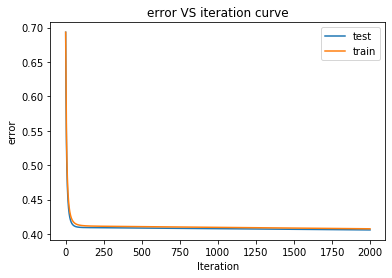

In [65]:
costs01 = np.squeeze(d0['costs'])
costs02 = np.squeeze(d0['costs_test'])
plt.plot(costs01)
plt.plot(costs02)
plt.legend(["test", "train"])
plt.xlabel('Iteration'); plt.ylabel('error'); plt.title('error VS iteration curve');

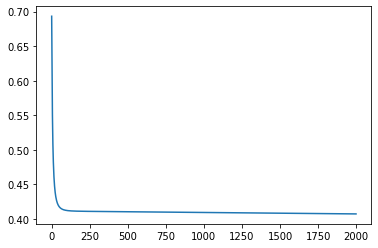

In [39]:
costs02 = np.squeeze(d0['costs_test'])
plt.plot(costs02)

# L1

In [40]:
d1 = model(X_train.T, Y_train, X_test.T, Y_test, gradient_L1, epoches = 200000, learning_rate = 0.00005, reg_const = 1e-2)

(1, 560)
(1, 320)
train accuracy: 82.32142857142857 %
test accuracy: 80.0 %


In [69]:
Y_pred = np.array(d1["Y_prediction_test"])
C = np.zeros((no_of_classes, no_of_classes))
#print(Y_test.shape)
#print(Y_test)
#print(Y_pred)
j = 0
for i in range(Y_test.shape[1]):
    index1 = int(Y_pred[0,i])
    index2 = int(Y_test[0,i])
    #print(index1)
    #print(index2)
    if index1 == index2:
        j = j+1
    C[index1 , index2] +=1
print(C)

[[151.  44.]
 [ 20. 105.]]


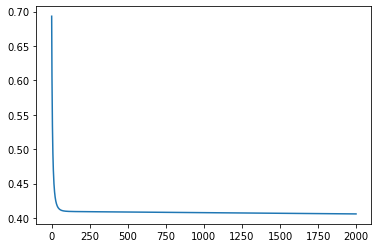

In [41]:
costs11 = np.squeeze(d1['costs'])
plt.plot(costs11)

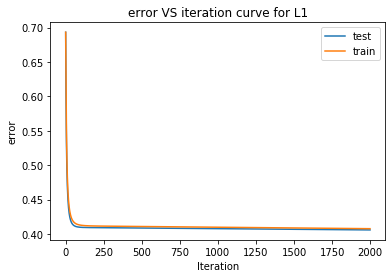

In [66]:
costs11 = np.squeeze(d1['costs'])
costs12 = np.squeeze(d1['costs_test'])
plt.plot(costs11)
plt.plot(costs12)
plt.legend(["test", "train"])
plt.xlabel('Iteration'); plt.ylabel('error'); plt.title('error VS iteration curve for L1');

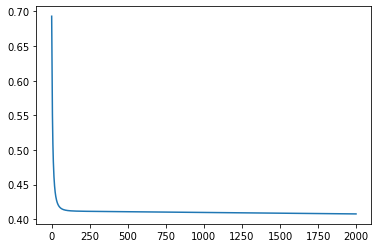

In [42]:
costs12 = np.squeeze(d1['costs_test'])
plt.plot(costs12)

# L2

In [43]:
d2 = model(X_train.T, Y_train, X_test.T, Y_test, gradient_L2, epoches = 200000, learning_rate = 0.00005, reg_const = 1e-2)

(1, 560)
(1, 320)
train accuracy: 82.32142857142857 %
test accuracy: 80.0 %


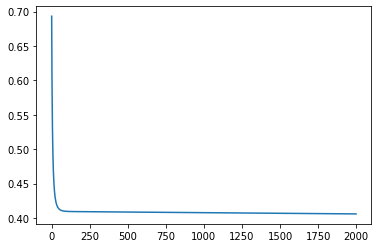

In [44]:
costs21 = np.squeeze(d2['costs'])
plt.plot(costs21)

In [70]:
Y_pred = np.array(d2["Y_prediction_test"])
C = np.zeros((no_of_classes, no_of_classes))
#print(Y_test.shape)
#print(Y_test)
#print(Y_pred)
j = 0
for i in range(Y_test.shape[1]):
    index1 = int(Y_pred[0,i])
    index2 = int(Y_test[0,i])
    #print(index1)
    #print(index2)
    if index1 == index2:
        j = j+1
    C[index1 , index2] +=1
print(C)

[[151.  44.]
 [ 20. 105.]]


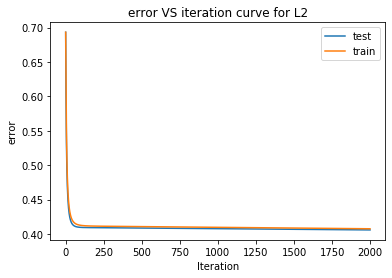

In [67]:
costs21 = np.squeeze(d2['costs'])
costs22 = np.squeeze(d2['costs_test'])
plt.plot(costs21)
plt.plot(costs22)
plt.legend(["test", "train"])
plt.xlabel('Iteration'); plt.ylabel('error'); plt.title('error VS iteration curve for L2');

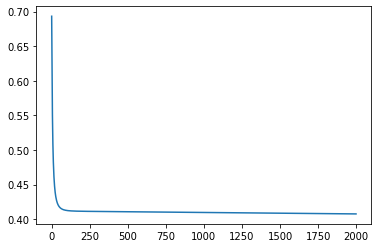

In [45]:
costs22 = np.squeeze(d2['costs_test'])
plt.plot(costs22)

# elastic

In [46]:
d3 = model(X_train.T, Y_train, X_test.T, Y_test, gradient_elastic, epoches = 200000, learning_rate = 0.00005, reg_const = 1e-2)

(1, 560)
(1, 320)
train accuracy: 82.32142857142857 %
test accuracy: 80.0 %


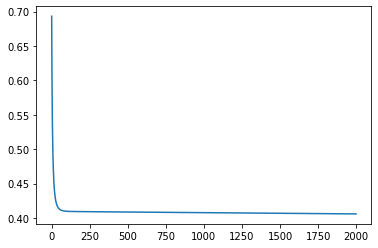

In [47]:
costs31 = np.squeeze(d3['costs'])
plt.plot(costs31)

In [71]:
Y_pred = np.array(d3["Y_prediction_test"])
C = np.zeros((no_of_classes, no_of_classes))
#print(Y_test.shape)
#print(Y_test)
#print(Y_pred)
j = 0
for i in range(Y_test.shape[1]):
    index1 = int(Y_pred[0,i])
    index2 = int(Y_test[0,i])
    #print(index1)
    #print(index2)
    if index1 == index2:
        j = j+1
    C[index1 , index2] +=1
print(C)

[[151.  44.]
 [ 20. 105.]]


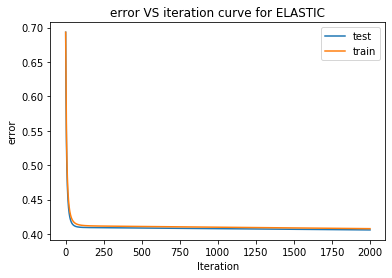

In [68]:
costs31 = np.squeeze(d3['costs'])
costs32 = np.squeeze(d3['costs_test'])
plt.plot(costs31)
plt.plot(costs32)
plt.legend(["test", "train"])
plt.xlabel('Iteration'); plt.ylabel('error'); plt.title('error VS iteration curve for ELASTIC');

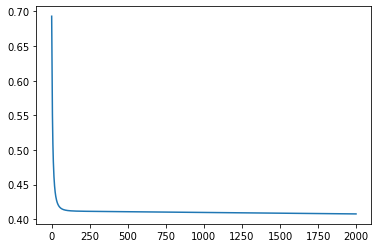

In [48]:
costs32= np.squeeze(d3['costs_test'])
plt.plot(costs32)

# L1 regulerizer

In [34]:
def gradient_L1(w,b,X,Y,X_t,Y_t, reg_const =1e-2):
    
    m = X.shape[1]
    logit = sigmoid(np.dot(w.T,X) + b)
    logit_t = sigmoid(np.dot(w.T,X_t) + b)
    cost = cost_function_cross_entropy(logit, Y)
    cost_test = cost_function_cross_entropy(logit_t, Y_t)
    dw = np.dot(X, (logit - Y).T)/m + reg_const*np.sign(w)
    db = np.sum(logit - Y , axis = 1, keepdims = True)/m
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    
    gradient = {"dw" : dw, "db" : db}
    return gradient, cost, cost_test

# L2 regulerizer

In [35]:
def gradient_L2(w,b,X,Y,X_t,Y_t, reg_const =1e-2):
    
    m = X.shape[1]
    logit = sigmoid(np.dot(w.T,X) + b)
    logit_t = sigmoid(np.dot(w.T,X_t) + b)
    cost = cost_function_cross_entropy(logit, Y)
    cost_test = cost_function_cross_entropy(logit_t, Y_t)
    dw = np.dot(X, (logit - Y).T)/m + reg_const*w
    db = np.sum(logit - Y , axis = 1, keepdims = True)/m
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    
    gradient = {"dw" : dw, "db" : db}
    return gradient, cost, cost_test

# Elastic

In [36]:
def gradient_elastic(w,b,X,Y,X_t,Y_t, reg_const =1e-2):
    
    m = X.shape[1]
    logit = sigmoid(np.dot(w.T,X) + b)
    logit_t = sigmoid(np.dot(w.T,X_t) + b)
    cost = cost_function_cross_entropy(logit, Y)
    cost_test = cost_function_cross_entropy(logit_t, Y_t)
    dw = np.dot(X, (logit - Y).T)/m + reg_const*w + reg_const*np.sign(w)
    db = np.sum(logit - Y , axis = 1, keepdims = True)/m
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    
    gradient = {"dw" : dw, "db" : db}
    return gradient, cost, cost_test